In [2]:
import sys                          
import pandas as pd, numpy as np             # Data manipulation 
from sklearn.decomposition import PCA        # The main algorithm
from matplotlib import pyplot as plt         # Graphing
import seaborn as sns                        # Graphing
from collections import defaultdict, Counter # Utils
sns.set(style="white")                       # Tuning the style of charts
import warnings                              # Disable some warnings
warnings.filterwarnings("ignore")

import pandas as pd

In [3]:
data = pd.read_csv("/Users/lucazosso/Desktop/IE_Course/Term_2/Machine Learning II/Group Assignement/data/testing/data_processed_cleaned.csv", index_col="song_id")
data.head()

,artist_popularity,track_age_2024,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,tone_EMaj,tone_Emin,tone_F#Maj,tone_F#min,tone_FMaj,tone_Fmin,tone_G#Maj,tone_G#min,tone_GMaj,tone_Gmin
song_id,,,,,,,,,,,,,,,,,,,,,
0,86,24,0.429,0.661,85,0.0281,0.00239,0.000121,0.2340,0.285,...,0,0,0,0,0,0,0,0,0,0
1,75,24,0.434,0.897,69,0.0488,0.01030,0.000000,0.6120,0.684,...,0,0,0,0,0,0,0,0,0,0
2,61,24,0.529,0.496,95,0.0290,0.17300,0.000000,0.2510,0.278,...,0,0,0,0,0,0,0,0,1,0
3,83,24,0.556,0.864,76,0.0584,0.00958,0.000000,0.2090,0.400,...,0,0,0,0,0,0,0,0,0,0
4,65,24,0.610,0.926,68,0.0479,0.03100,0.001200,0.0821,0.861,...,0,0,0,0,0,0,0,1,0,0


In [4]:
data.columns

Index(['artist_popularity', 'track_age_2024', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'track_popularity',
       'song_popularity_labels', 'genre_country', 'genre_folk',
       'genre_hip_hop_rap', 'genre_house_and_pop_fusion', 'genre_jazz',
       'genre_latin', 'genre_metal', 'genre_other', 'genre_pop',
       'genre_reggae', 'genre_rnb_soul', 'genre_rock',
       'genre_singer-songwriter', 'genre_underground_electronic', 'tone_A#min',
       'tone_AMaj', 'tone_Amin', 'tone_BMaj', 'tone_Bmin', 'tone_C#Maj',
       'tone_C#min', 'tone_CMaj', 'tone_Cmin', 'tone_D#Maj', 'tone_D#min',
       'tone_DMaj', 'tone_Dmin', 'tone_EMaj', 'tone_Emin', 'tone_F#Maj',
       'tone_F#min', 'tone_FMaj', 'tone_Fmin', 'tone_G#Maj', 'tone_G#min',
       'tone_GMaj', 'tone_Gmin'],
      dtype='object')

In [5]:
audio_features = ['danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms']

pca_data = data[audio_features]
pca_data.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
song_id,,,,,,,,,,
0,0.429,0.661,85,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773
1,0.434,0.897,69,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067
2,0.529,0.496,95,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547
3,0.556,0.864,76,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880
4,0.610,0.926,68,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400


<Axes: >

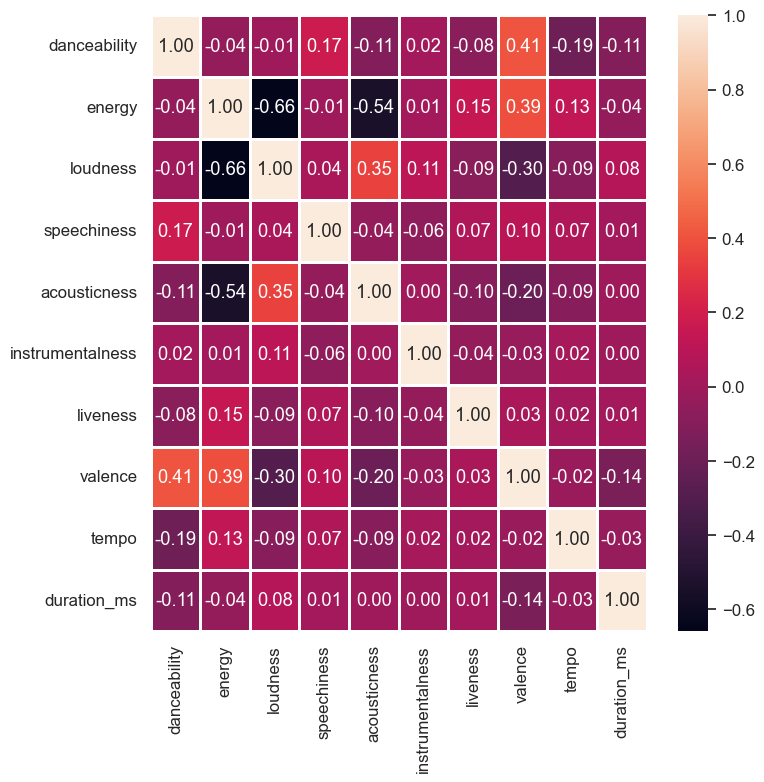

In [6]:
sns.set(font_scale=1.1)
fig, ax = plt.subplots(figsize=(8,8))         # Sample figsize in inches
sns.heatmap(pca_data.corr(), annot=True, fmt=".2f", linewidths=1, ax=ax)

In [7]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler().fit(pca_data)
X_std = ss.transform(pca_data)

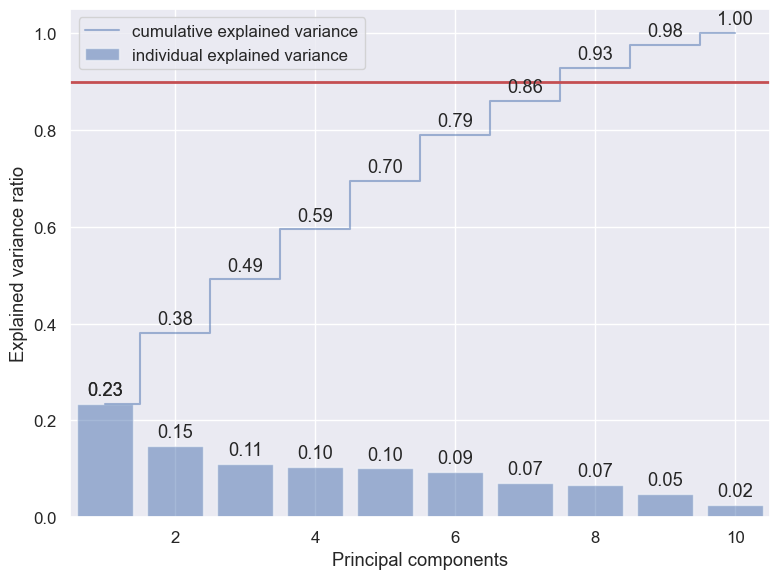

In [8]:
sklearn_pca = PCA()
Y_sklearn = sklearn_pca.fit_transform(X_std)

##### Vizualization

plt.rcParams["figure.figsize"] = (8, 6)
plt.bar(range(1,sklearn_pca.n_components_+1), sklearn_pca.explained_variance_ratio_, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1,sklearn_pca.n_components_+1), [sklearn_pca.explained_variance_ratio_[:y].sum() for y in range(1,sklearn_pca.n_components_+1)], alpha=0.5, where='mid',label='cumulative explained variance')
plt.axhline(y=0.9, linewidth=2, color = 'r')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
for i, ratio in enumerate(sklearn_pca.explained_variance_ratio_):
    plt.text(i+1, ratio + 0.01, f'{ratio:.2f}', ha='center', va='bottom')
for i, ratio in enumerate([sklearn_pca.explained_variance_ratio_[:y].sum() for y in range(1,sklearn_pca.n_components_+1)]):
    plt.text(i+1, ratio + 0.01, f'{ratio:.2f}', ha='center', va='bottom')
plt.xlim([0.5, sklearn_pca.n_components_+0.5])
plt.legend(loc='best')
plt.tight_layout()

In [9]:
eigenvalues = sklearn_pca.explained_variance_
var_ratio = sklearn_pca.explained_variance_ratio_

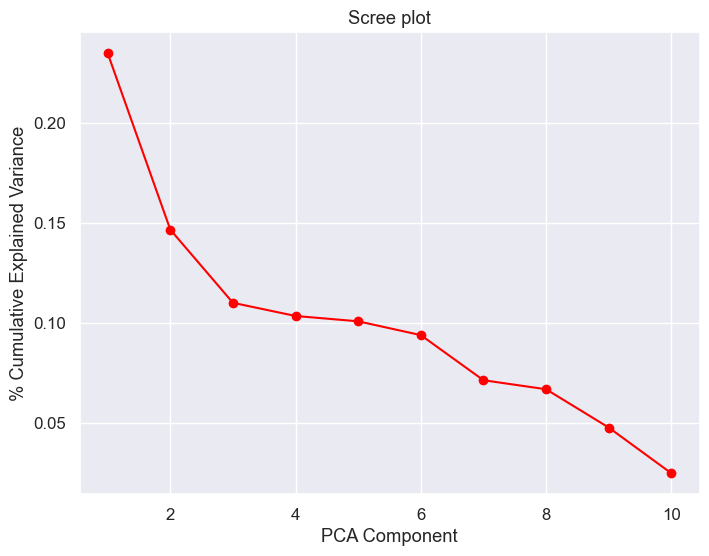

In [10]:
# Scree plot 
plt.plot(
    range(1,len(sklearn_pca.explained_variance_ratio_ )+1),
    sklearn_pca.explained_variance_ratio_,
    c='red', marker='o'
)
 
plt.xlabel('PCA Component')
plt.ylabel('% Cumulative Explained Variance')
plt.title('Scree plot')
plt.show()

In [11]:
VARIANCE_TO_KEEP = 0.75
keep_recommend = [sklearn_pca.explained_variance_ratio_[:y].sum()>VARIANCE_TO_KEEP for y in range(1,sklearn_pca.n_components_+1)].count(False)
print("Number of components to keep to retain %s%% of the variance:" % (100*VARIANCE_TO_KEEP), keep_recommend, "out of the original", sklearn_pca.n_components_)
retained_components_number = keep_recommend

sklearn_pca_final = PCA(n_components=retained_components_number)
Y_sklearn_final = sklearn_pca_final.fit_transform(X_std)

Number of components to keep to retain 75.0% of the variance: 5 out of the original 10


In [38]:
# Shows factor loadings = correlations between variables and factors
print ("Factor loadings:")

# loadings = eigenvectors * sqrt(eigenvalues)
loadings=sklearn_pca_final.components_.T * np.sqrt(sklearn_pca_final.explained_variance_)

dfloadings=pd.DataFrame(loadings.T,columns = pca_data.columns)
index_list=[]
for n in range(retained_components_number):
    index_list.append("PC"+str(n+1))

dfloadings.index = index_list
dfloadings

Factor loadings:


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
PC1,-0.207337,-0.867942,0.774759,-0.086669,0.686512,0.074108,-0.203854,-0.616120,-0.152689,0.151834
PC2,-0.832849,0.236326,-0.192522,-0.320610,-0.118684,0.003000,0.228472,-0.505195,0.440512,0.247901
PC3,0.000617,0.087922,-0.107286,-0.737331,-0.001344,0.434906,-0.489273,0.036314,-0.184681,-0.271455
PC4,0.011804,-0.041773,0.134259,0.344067,0.007224,0.483206,-0.168170,0.028833,0.693140,-0.391602
PC5,0.126450,0.080120,0.137093,0.122657,-0.240342,0.658452,0.076940,-0.015066,-0.150842,0.656936


In [39]:
# Hide values so that it is clearer
dfloadings.where(abs(dfloadings) > 0.3  , "")

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
PC1,,-0.867942,0.774759,,0.686512,,,-0.61612,,
PC2,-0.832849,,,-0.32061,,,,-0.505195,0.440512,
PC3,,,,-0.737331,,0.434906,-0.489273,,,
PC4,,,,0.344067,,0.483206,,,0.69314,-0.391602
PC5,,,,,,0.658452,,,,0.656936


[Text(0.5, 1.0, 'Component Matrix: Factor Loadings')]

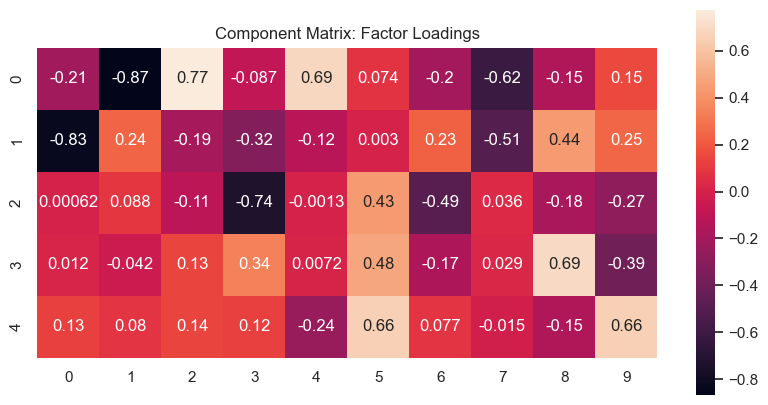

In [14]:
# For display reasons, we don't show all components if more than 50 (same for input variables)
n_components_to_show = min(50, sklearn_pca_final.n_components_)
n_input_features = loadings.shape[0]
decomp_df =loadings.T[0:n_components_to_show]

if decomp_df.shape[0] > 50:
    decomp_df = decomp_df[decomp_df.columns[0:50]]

fig = plt.figure(figsize=(n_input_features, n_components_to_show))
sns.set(font_scale=1)
sns.heatmap(decomp_df, square=True, annot=True).set(title='Component Matrix: Factor Loadings')

In [15]:
# Communalities
commun=[]

for col in dfloadings.columns:
    commun.append((dfloadings.iloc[0:3][col]**2).sum())
    
dfcommun = pd.DataFrame(commun,index=dfloadings.columns, columns=["Communalities"])
dfcommun.sort_values("Communalities", ascending=False)

,Communalities
energy,0.816904
danceability,0.736627
speechiness,0.653960
loudness,0.648826
valence,0.636145
acousticness,0.485386
liveness,0.333144
tempo,0.251472
instrumentalness,0.194644
duration_ms,0.158197


In [16]:
pca_data.dtypes


danceability        float64
energy              float64
loudness              int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
dtype: object

In [17]:
pca_data.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
song_id,,,,,,,,,,
0,0.429,0.661,85,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773
1,0.434,0.897,69,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067
2,0.529,0.496,95,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547
3,0.556,0.864,76,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880
4,0.610,0.926,68,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400


In [26]:
pca_data_with_pcs = pd.concat([data, pd.DataFrame(Y_sklearn_final[:, :5], columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])], axis=1)
pca_data_with_pcs.head()


,artist_popularity,track_age_2024,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,tone_Fmin,tone_G#Maj,tone_G#min,tone_GMaj,tone_Gmin,PC1,PC2,PC3,PC4,PC5
0,86,24,0.429,0.661,85,0.0281,0.00239,0.000121,0.2340,0.285,...,0,0,0,0,0,0.697489,2.681419,-0.475313,0.575820,0.265080
1,75,24,0.434,0.897,69,0.0488,0.01030,0.000000,0.6120,0.684,...,0,0,0,0,0,-1.863289,2.037136,-0.917177,0.337012,-0.962087
2,61,24,0.529,0.496,95,0.0290,0.17300,0.000000,0.2510,0.278,...,0,0,0,1,0,1.955014,1.289486,-0.361391,-0.056666,0.118168
3,83,24,0.556,0.864,76,0.0584,0.00958,0.000000,0.2090,0.400,...,0,0,0,0,0,-0.464720,0.915760,0.304314,-0.611131,0.001659
4,65,24,0.610,0.926,68,0.0479,0.03100,0.001200,0.0821,0.861,...,0,0,1,0,0,-1.901801,0.609784,0.664915,1.312768,-0.747559


In [27]:
pca_data_with_pcs.rename(columns={'PC1': 'PC1_Energetic_Dynamic', 'PC2': 'PC2_Speech_Tempo', 'PC3': 'PC3_Acoustic_Speech', 'PC4': 'PC4_Duration_Mood ', 'PC5': 'PC5_Acoustic_Liveness'}, inplace=True)
pca_data_with_pcs.head()


,artist_popularity,track_age_2024,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,tone_Fmin,tone_G#Maj,tone_G#min,tone_GMaj,tone_Gmin,PC1_Energetic_Dynamic,PC2_Speech_Tempo,PC3_Acoustic_Speech,PC4_Duration_Mood,PC5_Acoustic_Liveness
0,86,24,0.429,0.661,85,0.0281,0.00239,0.000121,0.2340,0.285,...,0,0,0,0,0,0.697489,2.681419,-0.475313,0.575820,0.265080
1,75,24,0.434,0.897,69,0.0488,0.01030,0.000000,0.6120,0.684,...,0,0,0,0,0,-1.863289,2.037136,-0.917177,0.337012,-0.962087
2,61,24,0.529,0.496,95,0.0290,0.17300,0.000000,0.2510,0.278,...,0,0,0,1,0,1.955014,1.289486,-0.361391,-0.056666,0.118168
3,83,24,0.556,0.864,76,0.0584,0.00958,0.000000,0.2090,0.400,...,0,0,0,0,0,-0.464720,0.915760,0.304314,-0.611131,0.001659
4,65,24,0.610,0.926,68,0.0479,0.03100,0.001200,0.0821,0.861,...,0,0,1,0,0,-1.901801,0.609784,0.664915,1.312768,-0.747559


In [28]:
data_clean_pca_audio_only = pca_data_with_pcs
data_clean_pca_audio_only = data_clean_pca_audio_only.rename_axis('song_id')
data_clean_pca_audio_only.head()

,artist_popularity,track_age_2024,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,tone_Fmin,tone_G#Maj,tone_G#min,tone_GMaj,tone_Gmin,PC1_Energetic_Dynamic,PC2_Speech_Tempo,PC3_Acoustic_Speech,PC4_Duration_Mood,PC5_Acoustic_Liveness
song_id,,,,,,,,,,,,,,,,,,,,,
0,86,24,0.429,0.661,85,0.0281,0.00239,0.000121,0.2340,0.285,...,0,0,0,0,0,0.697489,2.681419,-0.475313,0.575820,0.265080
1,75,24,0.434,0.897,69,0.0488,0.01030,0.000000,0.6120,0.684,...,0,0,0,0,0,-1.863289,2.037136,-0.917177,0.337012,-0.962087
2,61,24,0.529,0.496,95,0.0290,0.17300,0.000000,0.2510,0.278,...,0,0,0,1,0,1.955014,1.289486,-0.361391,-0.056666,0.118168
3,83,24,0.556,0.864,76,0.0584,0.00958,0.000000,0.2090,0.400,...,0,0,0,0,0,-0.464720,0.915760,0.304314,-0.611131,0.001659
4,65,24,0.610,0.926,68,0.0479,0.03100,0.001200,0.0821,0.861,...,0,0,1,0,0,-1.901801,0.609784,0.664915,1.312768,-0.747559


In [37]:
dfloadings.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
PC1,,-0.867942,0.774759,,0.686512,,,-0.61612,,
PC2,-0.832849,,,-0.32061,,,,-0.505195,0.440512,
PC3,,,,-0.737331,,0.434906,-0.489273,,,
PC4,,,,0.344067,,0.483206,,,0.69314,-0.391602
PC5,,,,,,0.658452,,,,0.656936


In [46]:
import plotly.graph_objects as go

categories = dfloadings.columns

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=dfloadings.iloc[0],
      theta=categories,
      fill='toself',
      name='PC1_Energetic_Dynamic'
))
fig.add_trace(go.Scatterpolar(
      r=dfloadings.iloc[1],
      theta=categories,
      fill='toself',
      name='PC2_Speech_Tempo'
))
fig.add_trace(go.Scatterpolar(
      r=dfloadings.iloc[2],
      theta=categories,
      fill='toself',
      name='PC3_Acoustic_Speech'
))
fig.add_trace(go.Scatterpolar(
      r=dfloadings.iloc[3],
      theta=categories,
      fill='toself',
      name='PC4_Duration_Mood'
))
fig.add_trace(go.Scatterpolar(
      r=dfloadings.iloc[4],
      theta=categories,
      fill='toself',
      name='PC5_Acoustic_Liveness'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

fig.show()


In [29]:
data_clean_pca_audio_only.to_csv("/Users/lucazosso/Desktop/IE_Course/Term_2/Machine Learning II/Group Assignement/data/modeling/data_clean_pca_audio_only")